![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Computer Lab: Longitudinal Motion
##### Author: E. Harms, N. Neveu

This worksheet demonstrates phase space motion in the longitudinal degree of freedom.   
Questions to be answered and turned in for grade are typeset in **Bold** Type.

## **NOTE!!!** Number of turns in this lab refers to the number of turns the particle travels around the ring.

### Python Notes: 
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
- Repeated variables are appeneded with a number (1,2,3) indicating the section they belong to.
- '2**2' represents two squared, i.e. 2^2
- A colon (:) means all values in that dimension. i.e. array[:,2] = all rows, second column


</br>
Also helpful: Shift+right click brings up OS/browser right-click menu, can copy image or save.

----------

In [2]:
%matplotlib inline

## 1. Longitudinal Phase Space Motion

The difference equations for longitudinal motion of a charged particle in a linac or synchrotron can be written as:

$\Delta E_{n+1} = \Delta E_n + eV (sin \phi_n - sin \phi_s)$

$\phi_{n+1} = \phi_n + \frac{2 \pi h \eta}{E} \Delta E_{n+1}$

The following cells allow the user to enter various initial conditions (i.e. various $\phi_0$, $\Delta E_0$) of particles and “track” their motion for a specified number of iterations.

In the worksheet program, the user can vary the parameters of the basic equations of motion to produce phase space plots in $\Delta E_0 -\phi$ coordinates.  
The default parameters are typical of Fermilab Main Injector operation at its injection energy.  
By inputting various initial conditions one can explore the phase space region under various parameter regimes.  
For example: The synchronous phase is initialized to 0. For this value locate the separatrix.



In [3]:
#Importing the libraries we need
import numpy as np

#Defining some variables
#These will be used later
h      = 588 #constant = 588
eV     = 1.28*10**-13  #constant = 1.28*10**-13 joule
GeV    = 1.6*10**-10   #constant = 10**9*eV
MeV    = GeV*10**-3    #constant = GeV*10**-3

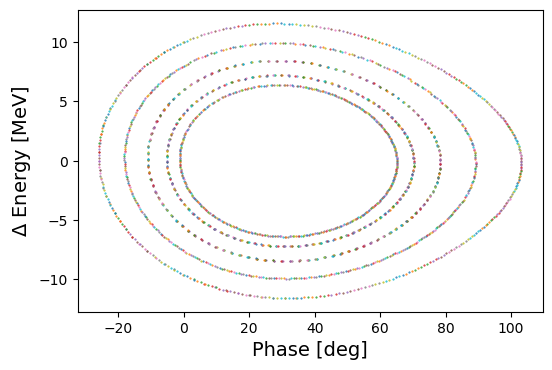

In [19]:
E_s1    = 8*GeV         # Energy: initial = 8 GeV
g_t1    = 21.8          # gamma_t: initial = 21.8
eta1    = 1/g_t1**2 - (0.938*GeV)**2 / E_s1**2
beta_s1 = np.sqrt(1 - ( (0.938*GeV) / E_s1 )**2 )  # Relativistic beta
k1      = (2*np.pi*h*eta1)/(beta_s1**2 * E_s1)  # coefficent (2pi h eta)/ E

#Tracking n Particles
#Change phi_vals[:,0] and dE_0[:,0] below to change the plot.
n       = 5      #number of particles: initial = 5
nturns1 = 400    #number of turns the particles travel: initial = 400
phi_s1  = np.deg2rad(30) #Synchronous phase: initial = 0


# Creating some arrays to hold the data
dE_vals1  = np.zeros((n,nturns1)) 
phi_vals1 = np.zeros((n,nturns1))

#Setting initial conditions:
dE_vals1[:,0]  = np.array([2,4,6,8,10])*MeV # Initial Energy of particles in MeV: 2,4,6,8,10
phi_vals1[:,0] = np.deg2rad([0,0,0,0,0])   # Intial Phase of particles: 0,0,0,0,0

#Calculating dE and phase for each particle for nturns.
for i in range(0,nturns1-1):
    #Angles
    radians1 = phi_vals1[:,i]
    
    #dE_n+1 = dE_n + eV* ( sin(phi_n) - sin(phi_s) )
    dE_vals1[:,i+1]  = dE_vals1[:,i] + eV*( np.sin(radians1) - np.sin(phi_s1) )
    
    #phi_n+1 = phi + k * dE_n + eV ( sin(phi_n) - sin(phi_s) )
    phi_vals1[:,i+1] = radians1 + k1* ( dE_vals1[:,i] + eV* ( np.sin(radians1) - np.sin(phi_s1)) ) 
    
# Importing plotting library
import matplotlib
from matplotlib import pyplot as plt
#Setting resolution of plot (changes size too)
matplotlib.rcParams['figure.dpi'] = 100 #initial = 100, Increase number for bigger plots

# Plotting the data
degrees1    = np.rad2deg(phi_vals1) #Deg
plt.plot(degrees1,dE_vals1/MeV, '.', markersize=1)
plt.xlabel('Phase [deg]', size=14)
plt.ylabel('$\Delta$ Energy [MeV]', size=14)
plt.show()

**Q1) What value of $\Delta E$ will the radiofrequency system support under these conditions?**

Please specify in MeV to at least one decimal place (eg, 10.0)


**Q2) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?  
Hint: Look at the motion of a particle that is very near the separatrix.**


**Q3) How does the motion behave near the “unstable fixed points”?**


---
Change the synchronous phase, $\phi_s$, to $30^{\circ}$ (what happens in a synchrotron when this phase change occurs?).  
Under these conditions...

**Q4) What value (approximately) of $\Delta E$ will the Radiofrequency system support now?**

hint: it may help to modify intitial phase as well, now that the stabile point has changed from $0^{\circ}$ to $30^{\circ}$.


**Q5) What happens to the particles that find themselves outside of the separatrix – are they lost from the synchrotron?**


**Q6) How does the motion behave near the “unstable fixed points”?**



---
Next, leaving the other parameters as they are, change the energy of the particle, $E_s$, from 8 GeV to 150 GeV.  
Where is the stable phase space region located now?  
(note: the transition energy of the Main Injector is about 22; what happens at transition?)



**Q7) What maximum $\Delta E$ will the RF system support now?**
Hint - you will need to find the optimal phase (phi_vals1) and increase the number of turns.



---
The user should feel free to play with the parameters of the program.  
Put in the parameters of you “favorite” accelerator and explore phase space.  
Be sure to play with changing the scales of the plot axes in order to see the results.

#### Optional: 
Since the difference equations are of a non-linear system, one can push the parameters until resonance islands, chaos, and other non-linear effects are found.  
Go back to the “stationary bucket” case ($\phi_s$ = 0): 
- Increase the voltage by a factor of 10 and look at the phase space; 
- another factor of 10; another; and so on. 
- Can you find other regions of stability in the phase space? 
- Is there a value of the voltage for which the entire phase space becomes unstable?

----

## 2. Synchrotron Tune vs. Oscillation Amplitude

In section #1, it should have been noticed that the motion i.e. the frequency at which particles circulate in phase space, slows down when the particle is near the separatrix, especially near the “unstable fixed points”. The Python library Numpy has a Fast Fourier Transform (FFT) function that allows one to analyze data for frequency content. 
The following code is similar to the previous code, but tracks a single particle. The motion of that particle is then analyzed using the FFT function, and the frequency (or, in this case, the synchrotron “tune”) of the particle’s motion is estimated by looking at what tune value corresponds to the peak of the FFT coefficients.
This expression is reproduced in Python so that the result of the FFT can be directly compared with the analytical result obtained by solving the equations of motion of a particle’s longitudinal motion.

- Track a particle for 254 turns (note: an FFT calculation requires that one track for 2n-2 turns, where n is an integer) 
- Use the initial conditions $\phi_0 = 0$ and $\Delta E_0 = 1$ MeV. 
- These should be the default values when the notebook is evaluated.

In [ ]:
#Tracking 1 Particle
#Change phi_vals and dE_vals below to change the plot.
power   = 8            #Used to decide number of turns and FFT, initial = 8
nturns2 = (2**power)-2  #number of turns to track: initial = 254
phi_s2  = 0             #Synchronous phase: initial = 0
E_s2    = 8*GeV         # Energy: initial = 8GeV
g_t2    = 21.8          # gamma_t: constant = 21.8
eta2    = 1/g_t2**2 - (0.938*GeV)**2 / E_s2**2
beta_s2 = np.sqrt(1 - ( (0.938*GeV) / E_s2 )**2 ) # Relativistic beta
k2      = (2*np.pi*h*eta2)/(beta_s2**2 * E_s2)    # coefficent (2pi h eta)/ E

# Creating some arrays to hold the data
dE_vals2  = np.zeros((nturns2+1)) 
phi_vals2 = np.zeros((nturns2+1))

#Setting initial conditions:
voltage      = 800*1.6*10**-16 # voltage constant = 800 e*kV
dE_vals2[0]  = np.array(1)*MeV # Initial Energy of particles in MeV: 1 MeV
phi_vals2[0] = np.deg2rad(0)   # Intial Phase of particles: 0

#Calculating dE and phase for each particle for nturns.
for i in range(0,nturns2):
    #Angles
    radians2 = phi_vals2[i]

    #dE_n+1 = dE_n + eV* ( sin(phi_n) - sin(phi_s) )
    dE_vals2[i+1]  = dE_vals2[i] + voltage*( np.sin(radians2) - np.sin(phi_s2) )
    
    #phi_n+1 = phi + k * dE_n + eV ( sin(phi_n) - sin(phi_s) )
    phi_vals2[i+1] = radians2 + k2* ( dE_vals2[i] + voltage* ( np.sin(radians2) - np.sin(phi_s2)) ) 

#Setting resolution and size of plots
matplotlib.rcParams['figure.dpi'] = 60 #initial = 100, Increase number for bigger plots

# Plotting the data
degrees2 = np.rad2deg(phi_vals2) #Deg
plt.plot(degrees2,dE_vals2/MeV, '.', markersize=1)
plt.xlabel('Phase [deg]', size=14)
plt.ylabel('$\Delta$ Energy [MeV]', size=14)
plt.show()

# Plotting phase of particles
plt.figure()
plt.plot(degrees2)
plt.ylabel('Phase [deg]', size=14)
plt.xlabel('Turn ', size=14)
plt.show()

# Calculating FFT 
n   = len(degrees2)            # length of the signal
frq = np.arange(n)/n           # two sides frequency range
frq = frq[range(int(n/2))]     # one side frequency range
Y   = np.fft.fft(degrees2)/power # fft computing and normalization
Y   = Y[range(int(n/2))]

#Plotting FFT 
plt.figure()
plt.plot(frq, abs(Y), '-')
plt.ylabel('$|fft|$', size=14)
plt.xlabel(r'$\nu_j$', size=14)
plt.xlim(-0.1, 0.5)
plt.show()

# The analytical small amplitude synchrotron tune is: 
numerator   = h*eta2*eV*np.cos(phi_s2) 
denominator = 2*np.pi*beta_s2**2*E_s2
nu_s        = np.sqrt(-numerator/denominator) # analytical tune

#Calculating percent error for Q9
print('analytical tune:', nu_s)
print('FFT Tune:', frq[np.argmax(abs(Y))])
error       = nu_s-frq[np.argmax(abs(Y))]
percent_err = (error/nu_s)*100
print('Percent error:', abs(percent_err))

**Q8) What synchrotron tune does the FFT of the tracking data show? How does this compare with the analytically predicted value?**
- Try varying the number of turns tracked, such as 126, 510, 2046, etc.

**Q9) For what number of turns is the FFT result within 5% of the predicted result?**

---

Next, tracking over 1022 turns, slowly raise the initial $\Delta E$ from 1 MeV (steps of 2 MeV are good) and keep track of the synchrotron tune. 
- **How does the tune behave?** 
- Record your numbers in the arrays in the next cell, so you can plot them.

**Q10) Based on the code above, make a plot of $\nu_{FFT}$ vs. $\Delta E_0$ for $\Delta E$ from 1 MeV to 26 MeV.**
- Note the value of $\Delta E$ at the separatrix.
- Study the synchronous tune vs. amplitude for other synchronous phases, $\phi_s$ (phi_s2).

In [ ]:
nu_fft = np.array([0.01172,0,0,0,0]) #.... continue filling in array
dE_fft = np.array([1,2,4,8,10])      #.... continue filling in array

---
## 3. Injection to Acceleration

The section demonstrates the effects of non-adiabatic variation of system parameters. This program, tracks a single particle in longitudinal phase space, and varies the RF synchronous phase linearly from $\phi_s=0$ (injection value) to a final value $\phi_{sf}$ (equal to 30 ̊ in the worksheet) used for acceleration.

The “injection porch” length – the time particles spend at the injection energy – is input with the parameter Nporch. The time it takes to reach the final acceleration rate is Nparab. The program plots $\phi_s$ versus turn number. The phase space plot begins by plotting only the first 900 turns (controlled by Nf).

In [ ]:
#Defining variables
g_t3    = 21.8  # gamma_t: initial = 21.8
phi_sf3 = 30    # Synchronous phase: initial = 30
Nporch3 = 1000  # injection porch length: intial = 1000
Nparab3 = 1000  # time to reach final acceleration rate: inital = 1000
Nmax    = 2*Nporch3 + Nparab3  # Max number of turns
E_s3    = 8*GeV # synchronous energy: initial = 8*GeV
eta3    = 1/g_t3**2 - (0.938*GeV)**2 / E_s3**2
beta_s3 = np.sqrt(1 - ( (0.938*GeV) / E_s3 )**2 )  # Relativistic beta
k3      = (2*np.pi*h*eta3)/(beta_s3**2 * E_s3)     # coefficent (2pi h eta)/ E

# Making data arrays
phi_vals3 = np.zeros([Nmax+1])
dE_vals3  = np.zeros([Nmax+1])

# Initial conditions
voltage      = 1.6*MeV # voltage: initial = 1.6*MeV
phi_vals3[0] = 0       # phase of particle, initial = 0
dE_vals3[0]  = 0.5*MeV # Energy spread of particle, dE = 1 MeV

# Looping through Nmax turns
for n in range(0,Nmax): 
    if n < Nporch3: 
        phi_s3 = np.deg2rad(0)
    elif (n >= Nporch3) and (n<(Nparab3+Nporch3)):
        phi_s3 = np.deg2rad(phi_sf3*(n-Nporch3)/(Nparab3))
    else:
        phi_s3 = np.deg2rad(30)
 
    #Angles
    radians3 = phi_vals3[n]
    
    #dE_n+1 = dE_n + eV* ( sin(phi_n) - sin(phi_s) )
    dE_vals3[n+1]  = dE_vals3[n] + voltage*( np.sin(radians3) - np.sin(phi_s3) )
    
    #phi_n+1 = phi + k * dE_n + eV ( sin(phi_n) - sin(phi_s) )
    phi_vals3[n+1] = radians3 + k3* ( dE_vals3[n] + voltage* ( np.sin(radians3) - np.sin(phi_s3)) ) 

#Setting resolution and size of plots
matplotlib.rcParams['figure.dpi'] = 100
# Plotting the data
Nf       = 900 #Number of turns to plot: initial = 900
degrees3 = np.rad2deg(phi_vals3) #Deg
plt.plot(degrees3[:Nf],dE_vals3[:Nf]/MeV, '-', markersize=1)
plt.xlabel('Phase [deg]', size=14)
plt.ylabel('$\Delta$ Energy [MeV]', size=14)
plt.grid()
plt.show()

**Q11) What is the synchrotron period in this example?**

---
- Vary Nf from 900 to the final value of 3000 in steps of 300. 
- Note how the particle’s phase space trajectory follows the synchronous phase as it moves from 0 to 30 degrees. 
- Note also how the size of the particle’s phase space ellipse remains essentially constant along the way. Thus, its “longitudinal emittance” is preserved in the process. The phase changes slowly enough that the motion is said to remain adiabatic.
- Next, change the “ramp parabola” i.e. decrease the number of turns it takes to make the RF synchronous phase reach 30 ̊. 
- Notice how the final particle emittance increases as the rate of phase change increases. 
- The process becomes non-adiabatic and the emittance is not preserved. 
- In general, if the motion is to be adiabatic, then the system parameters must change much more slowly than the period of the motion.

**Q12) What is the approximate fewest number of turns one can make the phase change in and still preserve the initial emittance?**